# INF8245E: Machine Learning | Assignment #1

**Louis Plessis (ID: 1933334)** | 4 October 2021

# 1. Sampling

## 1.1. Pseudocode to sample the student's routine

In [1]:
# We can only sample from uniform distribution over (0,1).
# Let's define a random number x bounded from [0,1)

# x = random(0,1)    # Random number between 0 and 1
# activity = ""

# if ( (x >= 0) and (x < 0.2) )
#     activity = "Movies"

# if ( (x >= 0.2) and (x < 0.6) )
#     activity = "INF8245E"

# if ( (x >= 0.6) and (x < 0.7) )
#    activity = "Playing"

# if ( (x >= 0.7) and (x < 1) )
#    activity = "Studying"

## 1.2. Sampling the student's routine

### For 100 days:

In [2]:
import numpy as np

activities_100days = {
    "Movies": 0,
    "INF8245E": 0,
    "Playing": 0,
    "Studying": 0,
}

for day in range(100):
    
    x = np.random.random()
    
    if x >= 0 and x < 0.2:
        activities_100days["Movies"] += 1
    elif x >= 0.2 and x < 0.6:
        activities_100days["INF8245E"] += 1
    elif x >= 0.6 and x < 0.7:
        activities_100days["Playing"] += 1
    elif x >= 0.7 and x < 1:
        activities_100days["Studying"] += 1

for activity, days in activities_100days.items():
    print("%s: \t %d/100 days" % (activity,days))

Movies: 	 17/100 days
INF8245E: 	 44/100 days
Playing: 	 13/100 days
Studying: 	 26/100 days


### For 1000 days:

In [3]:
activities_1000days = {
    "Movies": 0,
    "INF8245E": 0,
    "Playing": 0,
    "Studying": 0,
}

for day in range(1000):
    
    x = np.random.random()
    
    if x >= 0 and x < 0.2:
        activities_1000days["Movies"] += 1
    elif x >= 0.2 and x < 0.6:
        activities_1000days["INF8245E"] += 1
    elif x >= 0.6 and x < 0.7:
        activities_1000days["Playing"] += 1
    elif x >= 0.7 and x < 1:
        activities_1000days["Studying"] += 1

for activity, days in activities_1000days.items():
    print("%s: \t %d/1000 days" % (activity,days))

Movies: 	 207/1000 days
INF8245E: 	 381/1000 days
Playing: 	 108/1000 days
Studying: 	 304/1000 days


### Comparison with multinomial distribution

In [4]:
print("Differences between multinomial distribution and sample:")
print("100 days \t 1000 days")
print("%f \t %f" % (activities_100days["Movies"]/100 - 0.2, activities_1000days["Movies"]/1000 - 0.2))
print("%f \t %f" % (activities_100days["INF8245E"]/100 - 0.4, activities_1000days["INF8245E"]/1000 - 0.4))
print("%f \t %f" % (activities_100days["Playing"]/100 - 0.1, activities_1000days["Playing"]/1000 - 0.1))
print("%f \t %f" % (activities_100days["Studying"]/100 - 0.3, activities_1000days["Studying"]/1000 - 0.3))

Differences between multinomial distribution and sample:
100 days 	 1000 days
-0.030000 	 0.007000
0.040000 	 -0.019000
0.030000 	 0.008000
-0.040000 	 0.004000


The fractions are relatively close to the multinomial distribution, however sampling for 1000 days seem to cause less disparity on average.

# 2. Model selection

## 2.1. Fitting a 20-degree polynomial to the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Using Dataset-1
train = pd.read_csv("Dataset_1_train.csv", header=None)
valid = pd.read_csv("Dataset_1_valid.csv", header=None)
test = pd.read_csv("Dataset_1_test.csv", header=None)

#print(test.loc[39])

### 2.1. (a) Training and validation RMSE

$$w^* = (X^TX)^{-1} X^T y$$
$$\hat{y} = w^T x$$

In [6]:
def getX(data, degree):
    X = np.zeros((data.size, degree+1))
    for i in range(data.size):
        for j in range(degree+1):
            X[i][j] = np.power(data[i], j)
    return X

def getWStar(X,y):
    w = np.dot(X.T, X)    # X^T X
    w = np.linalg.inv(w)  #(X^T X)^(-1)
    w = np.dot(w, X.T)    #(X^T X)^(-1) X^T
    w = np.dot(w, y)      #(X^T X)^(-1) X^T y
    return w

X = getX(train[0].values, 20)
wStar = getWStar(X, train[1])

def getYHat(w,x):        # y^ = w*^T x
    y = np.zeros(x.size)
    for i in range(x.size):
        for j in range(w.size):
            y[i] += (w[j] * np.power(x[i], j))
    return y

trainYHat = getYHat(wStar, train[0])
validYHat = getYHat(wStar, valid[0])

def getRMSE(y,yHat):
    mse = np.square(np.subtract(y,yHat)).mean()
    rmse = np.sqrt(mse)
    return rmse

print("Training RMSE: \t\t", getRMSE(train[1], trainYHat))
print("Training RMSE: \t\t", getRMSE(valid[1], validYHat))

Training RMSE: 		 2.544590374303791
Training RMSE: 		 37.6148458260915


### 2.1. (b) Visualizing the fit

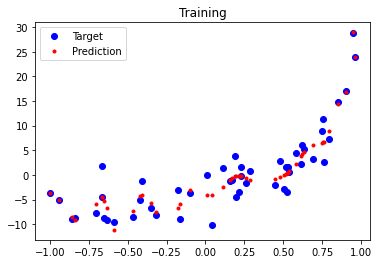

In [7]:
import matplotlib.pyplot as plt

plt.plot(train[0], train[1], 'bo')
plt.plot(train[0], trainYHat, 'r.')
plt.title('Training')
plt.legend(['Target', 'Prediction'])
plt.show()

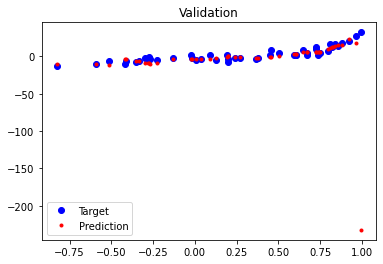

In [8]:
plt.plot(valid[0], valid[1], 'bo')
plt.plot(valid[0], validYHat, 'r.')
plt.title('Validation')
plt.legend(['Target', 'Prediction'])
plt.show()

### 2.1. (c)

In [9]:
testYHat = getYHat(wStar, test[0])
print("Test RMSE: \t\t", getRMSE(test[1],testYHat))

Test RMSE: 		 7.092967781248054


The test error is high, which means the generalization performance is bad. Hence, the model is probably overfitting.

## 2.2. L2 regularization

### 2.2. (a) Training and Validation RMSE

$$w = (X^TX + \lambda I)^{-1} X^T y$$

In [10]:
#L2 Regularization

def getL2W(X,y,l,degree):
    w = np.dot(X.T, X)             # X^T X
    w += l*np.identity(degree+1)   # X^T X + lambda*I
    w = np.linalg.inv(w)           #(X^T X + lambda*I)^(-1)
    w = np.dot(w, X.T)             #(X^T X + lambda*I)^(-1) X^T
    w = np.dot(w, y)               #(X^T X + lambda*I)^(-1) X^T y
    return w

wArray = []
lambdaArray = []
lambdaValue = 0.01
RMSEtrain = []
RMSEvalid = []
X_L2 = getX(train[0], 20)
    
while lambdaValue < 1:
    w = getL2W(X_L2, train[1], lambdaValue, 20)
    RMSEtrain.append(getRMSE(train[1], getYHat(w,train[0])))
    RMSEvalid.append(getRMSE(valid[1], getYHat(w,valid[0])))
    lambdaArray.append(lambdaValue)
    wArray.append(w)
    lambdaValue += 0.01

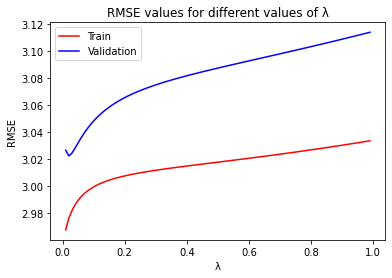

In [11]:
#Plotting RMSE values
plt.plot(lambdaArray, RMSEtrain, 'r')
plt.plot(lambdaArray, RMSEvalid, 'b')
plt.xlabel("λ")
plt.ylabel("RMSE")
plt.legend(['Train', 'Validation'])
plt.title('RMSE values for different values of λ')
plt.show()

### 2.2. (b) Best value of $\lambda$

In [12]:
#Step 2: "Pick the value of λ that has best validation performance"

bestLambdaValue = lambdaArray[np.argmin(RMSEvalid)]
print("Best value of λ is: ", bestLambdaValue)

Best value of λ is:  0.02


In [13]:
#Step 3: "Compute the test performance for the model with chosen λ"

bestW = wArray[np.argmin(RMSEvalid)]
print("** Test performance **")
print("Train RMSE: ", getRMSE(train[1], getYHat(bestW,train[0])))
print("Valid RMSE: ", getRMSE(valid[1], getYHat(bestW,valid[0])))
print("Test RMSE: ", getRMSE(test[1], getYHat(bestW,test[0])))

** Test performance **
Train RMSE:  2.976181559923893
Valid RMSE:  3.0224325939041834
Test RMSE:  3.275701207516833


### 2.2. (c) Visualizing the fit

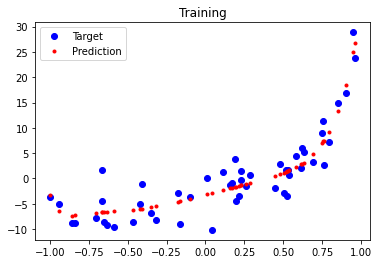

In [14]:
plt.plot(train[0], train[1], 'bo')
plt.plot(train[0], getYHat(bestW,train[0]), 'r.')
plt.title('Training')
plt.legend(['Target', 'Prediction'])
plt.show()

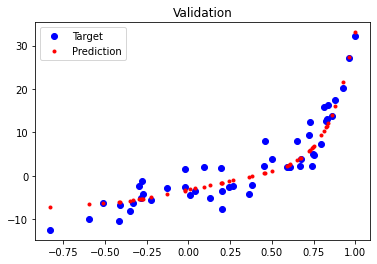

In [15]:
plt.plot(valid[0], valid[1], 'bo')
plt.plot(valid[0], getYHat(bestW,valid[0]), 'r.')
plt.title('Validation')
plt.legend(['Target', 'Prediction'])
plt.show()

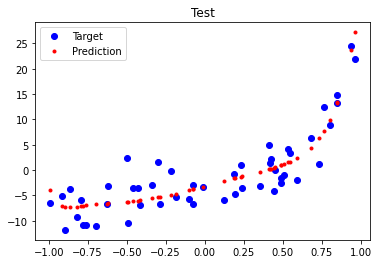

In [16]:
plt.plot(test[0], test[1], 'bo')
plt.plot(test[0], getYHat(bestW,test[0]), 'r.')
plt.title('Test')
plt.legend(['Target', 'Prediction'])
plt.show()

### 2.2. (d)

The test RMSE is rather low compared to the model without regularization (3.27 < 7.09). Also, the fitted curve does not oscillate like the one without regularization. Hence, there is no proof here that the model is overfitting or underfitting.

## 2.3. Source polynomial

The model’s curve seems to cross the x-axis 3 times, for both no-regularization and L2-regularization situations. Therefore, the degree of the source polynomial is probably around 4.

# 3. Gradient Descent for Regression

In [17]:
#Using Dataset-2
train = pd.read_csv("Dataset_2_train.csv", header=None)
valid = pd.read_csv("Dataset_2_valid.csv", header=None)
test = pd.read_csv("Dataset_2_test.csv", header=None)

## 3.1. Stochastic gradient descent

For i in 1 to N:
    $$w_0 = w_0 - \alpha (\hat{y}(x^{(i)};w)-y^{(i)})$$
    $$w_1 = w_1 - \alpha (\hat{y}(x^{(i)};w)-y^{(i)}) x^{(i)}$$

In [18]:
import random

def YHat(w,x):
    return w[0] + w[1]*x

def SGD(train, valid, test, alpha, epochs, shuffle):
    RMSEtrain = []
    RMSEvalid = []
    RMSEtest = []
    w = [100,100] # random numbers
    
    #slower but safer
    if shuffle:   
        for i in range(epochs):
            trainXShuffled = train[0]
            random.shuffle(trainXShuffled)
            trainYShuffled = train[1]
            random.shuffle(trainYShuffled)
            for j in range(train[0].size):
                w[0]=w[0]-(alpha * ( YHat(w, trainXShuffled[j]) - trainYShuffled[j] ))
                w[1]=w[1]-(alpha * ( YHat(w, trainXShuffled[j]) - trainYShuffled[j] ) * trainXShuffled[j])
            RMSEtrain.append(getRMSE(train[1], YHat(w, train[0])))
            RMSEvalid.append(getRMSE(valid[1], YHat(w, valid[0])))
            RMSEtest.append(getRMSE(test[1], YHat(w, test[0])))
    #faster but might hinder learning
    else:        
        for i in range(epochs):
            for j in range(train[0].size):
                w[0]=w[0]-(alpha * ( YHat(w, train[0][j]) - train[1][j] ))
                w[1]=w[1]-(alpha * ( YHat(w, train[0][j]) - train[1][j] ) * train[0][j])
            RMSEtrain.append(getRMSE(train[1], YHat(w, train[0])))
            RMSEvalid.append(getRMSE(valid[1], YHat(w, valid[0])))
            RMSEtest.append(getRMSE(test[1], YHat(w, test[0])))
    return RMSEtrain, RMSEvalid, RMSEtest, w

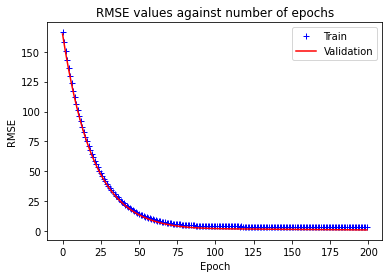

In [19]:
# α = step size = 10^(-4)
alpha = 0.0001

# epochs = iterations = 200 (converges around 50-75)
epochs = 200

RMSEtrain, RMSEvalid, RMSEtest, w = SGD(train, valid, test, alpha, epochs, True)

plt.plot(list(range(epochs)), RMSEtrain, "b+")
plt.plot(list(range(epochs)), RMSEvalid, "r")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(['Train', 'Validation'])
plt.title('RMSE values against number of epochs')
plt.show()

## 3.2. Step size

In [20]:
a = 1
RMSEs = []
print("Step size (α)\tValidation RMSE")
for i in range(10):
    a /= 10
    RMSEtrain, RMSEvalid, RMSEtest, w = SGD(train, valid, test, a, epochs, False)
    print("%.0e\t\t%f" % (a,min(RMSEvalid)))
    RMSEs.append(min(RMSEvalid))

Step size (α)	Validation RMSE
1e-01		1.970778
1e-02		0.945441
1e-03		0.544306
1e-04		1.025111
1e-05		63.962194
1e-06		156.826801
1e-07		171.524027
1e-08		173.067318
1e-09		173.222408
1e-10		173.237924


In [21]:
bestAlpha = 10**int(-(np.argmin(RMSEs) + 1))
print("Lowest Validation RMSE = ", min(RMSEs), " found when α = ", bestAlpha)

Lowest Validation RMSE =  0.5443059220738907  found when α =  0.001


In [22]:
RMSEtrain, RMSEvalid, RMSEtest, w = SGD(train, valid, test, 0.001, 200, False)
print("Test RMSE of the chosen model ( α = ", bestAlpha, ") is:", min(RMSEtest))

Test RMSE of the chosen model ( α =  0.001 ) is: 0.5255603503056664


## 3.3. Visualizations

In [23]:
def getYHatVector(w,x):
    y = np.zeros(x.size)
    for i in range(x.size):
        y[i] = YHat(w,x[i])
    return y

In [24]:
def vizFit(epoch):
    RMSEtrain, RMSEvalid, RMSEtest, w = SGD(train, valid, test, bestAlpha, epoch, False)
    plt.plot(test[0], test[1], "r.", test[0], getYHatVector(w,test[0]))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(['Test', 'Model'])
    plt.title('Epoch #%d' % epoch)
    plt.show()

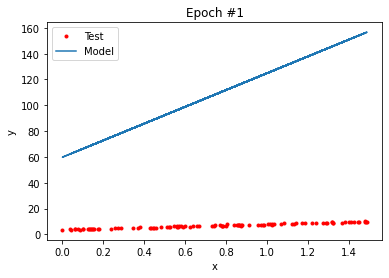

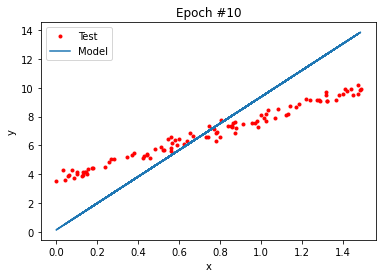

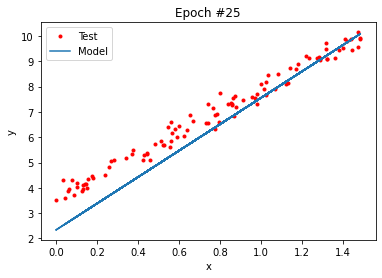

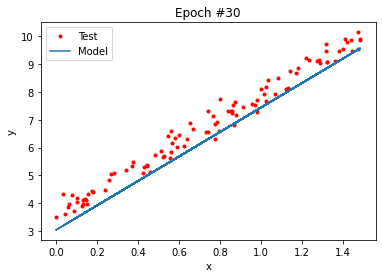

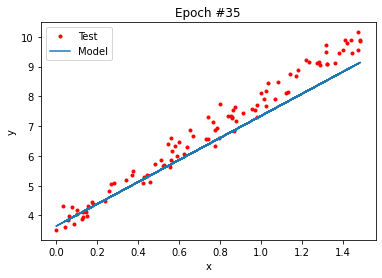

In [25]:
vizFit(1)
vizFit(10)
vizFit(25)
vizFit(30)
vizFit(35)

It seems like we are getting the best fit at around 30 epochs. However, after 35 epochs, the model gradually moves away from the test data.

## 3.4. Full-batch gradient descent

Repeat until convergence:
$$w_0 = w_0 - \alpha \frac{1}{N} \sum_{i=1}^{N} (\hat{y}(x^{(i)};w)-y^{(i)})$$
$$w_1 = w_1 - \alpha \frac{1}{N} \sum_{i=1}^{N} (\hat{y}(x^{(i)};w)-y^{(i)}) x^{(i)}$$

In [26]:
def fullBatchGD(train, valid, test, alpha):      
    RMSEtrain = []
    RMSEvalid = []
    RMSEtest = []
    w = np.random.rand(2)
    
    sumW0 = 0
    sumW1 = 0
    N = train[0].size
    
    for i in range(N):
        sumW0 += YHat(w, train[0][i]) - train[1][i]
        sumW1 += ( YHat(w, train[0][i]) - train[1][i] ) * train[0][i]
    
    converging = False
    
    epoch=0
    
    while not converging:
        w[0]=w[0]-(alpha * (1/N) * sumW0)
        w[1]=w[1]-(alpha * (1/N) * sumW1)
        
        RMSEtrain.append(getRMSE(train[1], YHat(w, train[0])))
        RMSEvalid.append(getRMSE(valid[1], YHat(w, valid[0])))
        RMSEtest.append(getRMSE(test[1], YHat(w, test[0])))
        
        if epoch>1 and RMSEtrain[epoch]>RMSEtrain[epoch-1]:
            converging = True
        epoch+=1
    return RMSEtrain, RMSEvalid, RMSEtest, w, epoch

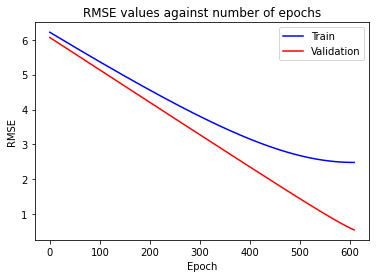

In [27]:
alpha = 0.001

RMSEtrain, RMSEvalid, RMSEtest, w, epochs = fullBatchGD(train, valid, test, alpha)

plt.plot(list(range(epochs)), RMSEtrain, "b")
plt.plot(list(range(epochs)), RMSEvalid, "r")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(['Train', 'Validation'])
plt.title('RMSE values against number of epochs')
plt.show()

## 3.5. Full-batch vs. Stochastic gradient descent

Full-batch gradient descent seems to work better as it stops automatically when the model converges. Stochastic gradient descent doesn't guarantee that the best fit will be found at the last epoch (it will probably be found before, as seen on graphs in section 3.3).

# 4. Real life dataset

In [28]:
#Using communities.data from https://archive.ics.uci.edu/ml/datasets/communities+and+crime
data = pd.read_csv("communities.data", header=None)
display(data)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [29]:
def missingData():
    print("Column no.\t Missing attributes \t % of data missing")
    for i in range(data.columns.size):
        missing = 0
        for j in range(data[i].size):
            if data[i][j] == "?":
                missing += 1
        if missing>0:
            print(i, "\t\t", missing, "\t\t\t", (missing/data[i].size)*100, "%")
missingData()

Column no.	 Missing attributes 	 % of data missing
1 		 1174 			 58.876629889669005 %
2 		 1177 			 59.027081243731196 %
30 		 1 			 0.05015045135406219 %
101 		 1675 			 84.00200601805416 %
102 		 1675 			 84.00200601805416 %
103 		 1675 			 84.00200601805416 %
104 		 1675 			 84.00200601805416 %
105 		 1675 			 84.00200601805416 %
106 		 1675 			 84.00200601805416 %
107 		 1675 			 84.00200601805416 %
108 		 1675 			 84.00200601805416 %
109 		 1675 			 84.00200601805416 %
110 		 1675 			 84.00200601805416 %
111 		 1675 			 84.00200601805416 %
112 		 1675 			 84.00200601805416 %
113 		 1675 			 84.00200601805416 %
114 		 1675 			 84.00200601805416 %
115 		 1675 			 84.00200601805416 %
116 		 1675 			 84.00200601805416 %
117 		 1675 			 84.00200601805416 %
121 		 1675 			 84.00200601805416 %
122 		 1675 			 84.00200601805416 %
123 		 1675 			 84.00200601805416 %
124 		 1675 			 84.00200601805416 %
126 		 1675 			 84.00200601805416 %


## 4.1. Data set

### 4.1. (a) Using sample mean of each column to fill in the missing attributes

In [30]:
def getMean(row):
    j = 0
    k = 0
    sum = 0
    for i in range(row.size):
        if row[i] != '?':
            j += 1
            sum += float(row[i])
    return sum/j

#Replacing all "?" values by average of column
r = list(range(data.columns.size))
r.pop(3)  #skip column 3
for i in r:
    data[i] = data[i].replace('?', getMean(data[i]))
    
display(data)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,58.826829,46188.336597,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,6,58.826829,46188.336597,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


Using sample mean of each column is not a good way to fill in missing attributes (especially if a large proportion of them are missing) as it creates false data that'd be interpreted as true data when using ML algorithms. In our case, we've got between $58$% and $84$% of the data missing for some columns. Additionally, we don't know if these numbers are quantities or categories (e.g., column 3 values are categories). Using the sample mean for missing categories would not make sense at all. Hence, in our case, this method is not the best.

### 4.1. (b) Other ways to fill in the missing attributes

Other ways to deal with missing data would be to:
* Delete columns with too much data missing
* Delete rows with missing data if they represent only a small proportion of the column
* For columns with categories, consider missing attributes as part of an extra category "N/A".

### 4.1. (c) Completing data set

Using the "communities.names" file, we can suppose that columns **1 (county code), 2 (community code)** and **3 (community name)** are categories. Let's replace "?" values of **columns 1 and 2** by "0" values (new county and community "0").

In [31]:
data = pd.read_csv("communities.data", header=None)
data[1] = data[1].replace('?', 0)
data[2] = data[2].replace('?', 0)

Column no. 30 only has one missing attribute: let's delete the corresponding row.

In [32]:
for i in range(data[30].size):
    if(data[30][i]) == "?":
        row = i
        
data = data.drop(row)

Columns 101 to 117, 121 to 124 and 126 have more than 84% of their attributes missing. Let's delete these columns.

In [33]:
data = data.drop(columns=[101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,121,122,123,124,126])

This method is better because we are making sure that only "real" data is going to be used in the next sections. Even though we've deleted one row and a few columns, we are still left with plenty of data to work with. I also think it was important not to delete columns 1, 2 and 3 as their values are categories and thus very important for the next steps.

### 4.1. (d) Completed data set

In [34]:
#Exporting to CSV
data.to_csv("communities_data_completed.csv",index=False, header=False)
data = pd.read_csv("communities_data_completed.csv", header=None)
display(data)

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,8,0,0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,0,0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,0,0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,0,0,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1989,6,0,0,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [35]:
#Making sure there are no "?" values remaining
missingData()

Column no.	 Missing attributes 	 % of data missing


## 4.2. 5-fold cross-validation

In [36]:
#20% testing, 80% training (80/20 split), 5 folds

import random

k = 5
tests= []
trains = []
    
items = list(range(data[0].size))
random.shuffle(items)
splits = np.array_split(items, k)
    
for fold in range(k):
    test = pd.DataFrame()
    train = data
    testSize = int(0.2 * data[0].size)
    visited = []

    j = 0

    for i in splits[fold]:
        test = test.append(train.loc[i])
        train = train.drop(i)
        visited.append(i)
        
    tests.append(test)
    trains.append(train)
    
display(tests[0])
display(trains[0])

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
1761,42.0,7.0,12016.0,Centertownship,9.0,0.00,0.50,0.04,0.96,0.03,...,0.07,0.91,0.85,0.88,0.86,0.04,0.06,0.02,0.00,0.03
66,37.0,0.0,0.0,Gastoniacity,1.0,0.07,0.42,0.48,0.61,0.04,...,0.03,0.77,0.59,0.80,0.76,0.09,0.15,0.05,0.00,0.61
786,44.0,7.0,37720.0,Johnstontown,4.0,0.03,0.44,0.01,0.99,0.03,...,0.12,0.89,0.84,0.94,0.88,0.07,0.09,0.09,0.00,0.04
461,6.0,0.0,0.0,Commercecity,3.0,0.00,1.00,0.02,0.06,0.08,...,1.00,0.48,0.63,0.91,0.82,0.02,0.15,0.35,0.00,1.00
1414,18.0,0.0,0.0,BeechGrovecity,8.0,0.01,0.33,0.00,0.99,0.03,...,0.03,0.79,0.52,0.80,0.84,0.01,0.27,0.07,0.00,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,9.0,9.0,82870.0,WestHaventown,2.0,0.07,0.38,0.24,0.76,0.12,...,0.25,0.73,0.67,0.80,0.76,0.03,0.42,0.19,0.58,0.12
1877,25.0,9.0,34550.0,Lawrencecity,10.0,0.10,0.56,0.12,0.47,0.12,...,0.62,0.56,0.44,0.64,0.49,0.02,0.84,0.15,0.93,0.88
127,6.0,0.0,0.0,LomaLindacity,1.0,0.01,0.56,0.12,0.45,1.00,...,0.87,0.32,0.14,0.31,0.42,0.02,0.21,0.07,0.00,0.14
1129,34.0,25.0,19840.0,Eatontownborough,6.0,0.01,0.38,0.24,0.68,0.40,...,0.31,0.44,0.38,0.46,0.25,0.01,0.19,0.13,0.00,0.09


,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,8,0,0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
2,24,0,0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
5,6,0,0,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,0,0,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1989,6,0,0,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


### 4.2. (a) Average RMSE

In [37]:
trainRMSE = []
testRMSE = []
wArray = []

xTest = []
yTest = []
xTrain = []
yTrain = []
    
for fold in range(k):
    #value to be predicted is the last column (#105)
    xTest.append(tests[fold].drop(columns=[105]))
    yTest.append(tests[fold][105])
    xTrain.append(trains[fold].drop(columns=[105]))
    yTrain.append(trains[fold][105])

#Unfortunately i couldn't find a more efficient way to compute this
#and it is too complex for my computer, running time is too long:
    
#for i in range(k):
#    w = getWStar(xTrain[i],yTrain[i])
#    wArray.append(w)
#    RMSEtest.append(getRMSE(yTest[i], getYHat(w,xTest[i])))
#    RMSEtrain.append(getRMSE(yTrain[i], getYHat(w,xTrain[i])))

## 4.3. Ridge-regression